In [1]:
import datetime
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components

In [2]:
data_original_path = 'public_data.csv'
data_predicted_path = 'predicted_data.csv'

In [3]:
df = pd.read_csv(
    data_original_path
)

In [4]:
df = df[df.index > 800]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 801 to 1580
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       780 non-null    object 
 1   Brazil     780 non-null    float64
 2   China      780 non-null    float64
 3   EU27 & UK  780 non-null    float64
 4   France     780 non-null    float64
 5   Germany    780 non-null    float64
 6   India      780 non-null    float64
 7   Italy      780 non-null    float64
 8   Japan      780 non-null    float64
 9   ROW        780 non-null    float64
 10  Russia     780 non-null    float64
 11  Spain      780 non-null    float64
 12  UK         780 non-null    float64
 13  US         780 non-null    float64
dtypes: float64(13), object(1)
memory usage: 91.4+ KB


In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 801 to 1580
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       780 non-null    object 
 1   Brazil     780 non-null    float64
 2   China      780 non-null    float64
 3   EU27 & UK  780 non-null    float64
 4   France     780 non-null    float64
 5   Germany    780 non-null    float64
 6   India      780 non-null    float64
 7   Italy      780 non-null    float64
 8   Japan      780 non-null    float64
 9   ROW        780 non-null    float64
 10  Russia     780 non-null    float64
 11  Spain      780 non-null    float64
 12  UK         780 non-null    float64
 13  US         780 non-null    float64
dtypes: float64(13), object(1)
memory usage: 91.4+ KB


In [8]:
df.head(len(df))

date    Brazil    China  EU27 & UK    France   Germany    India  \
801   2021-03-12  0.227715  14.7870    1.75725  0.053606  0.279995  3.97206   
802   2021-03-13  0.230448  14.2525    1.41799  0.047747  0.248366  3.86199   
803   2021-03-14  0.179818  14.1747    1.35578  0.049659  0.250500  3.83891   
804   2021-03-15  0.199709  14.0969    2.10185  0.074517  0.481299  4.00599   
805   2021-03-16  0.224958  14.0710    2.50557  0.116416  0.682304  4.06184   
...          ...       ...      ...        ...       ...       ...      ...   
1576  2023-04-26  0.077217  12.8167    2.13630  0.071983  0.608401  4.64477   
1577  2023-04-27  0.085026  12.5333    2.10184  0.063637  0.570781  4.63733   
1578  2023-04-28  0.087688  12.7240    2.02278  0.053702  0.553663  4.62988   
1579  2023-04-29  0.086880  12.3350    1.58467  0.042707  0.442416  4.49509   
1580  2023-04-30  0.086101  12.1263    1.28469  0.021018  0.357500  4.04096   

         Italy     Japan      ROW   Russia     Spain        UK       US  
801   0.218385  1.577040  9.83151  3.80365  0.071464  0.099260  3.46616  
802   0.140624  1.373070  9.18626  3.70505  0.060277  0.087006  3.08868  
803   0.133895  1.164170  8.99620  3.52350  0.064423  0.091217  2.68679  
804   0.182695  1.322880  9.44251  3.56582  0.074493  0.214981  3.69321  
805   0.216054  1.455390  9.63797  3.52769  0.063217  0.187870  4.04491  
...        ...       ...      ...      ...       ...       ...      ...  
1576  0.167239  1.139650  9.16747  2.91560  0.133007  0.257793  3.67753  
1577  0.196119  0.893992  9.03488  2.88062  0.141121  0.206427  3.75927  
1578  0.186986  0.867402  9.11146  2.86482  0.117339  0.190213  3.70957  
1579  0.122750  0.773452  8.91205  2.84520  0.085939  0.187084  3.43081  
1580  0.104926  0.746819  8.50039  2.77973  0.082608  0.119366  3.03559  

[780 rows x 14 columns]

In [9]:
def country_df(country_name, df):
    ds_current = df['date']
    y_current = df[country_name]
    globals()['df_' + country_name] = pd.DataFrame({
        'ds': ds_current, 'y': y_current
    })
    globals()['df_' + country_name]['ds'] = pd.to_datetime(globals()['df_' + country_name]['ds'])
    globals()['df_' + country_name]['y'] = globals()['df_' + country_name]['y'].astype('float64')
    print(f'df_{country_name} added')

In [10]:
def show_df_info(df):
    df.plot(x='ds', y='y', figsize=(18, 6))

In [11]:
country_list = df.columns[1:]

df_Brazil added
df_China added
df_EU27 & UK added
df_France added
df_Germany added
df_India added
df_Italy added
df_Japan added
df_ROW added
df_Russia added
df_Spain added
df_UK added
df_US added


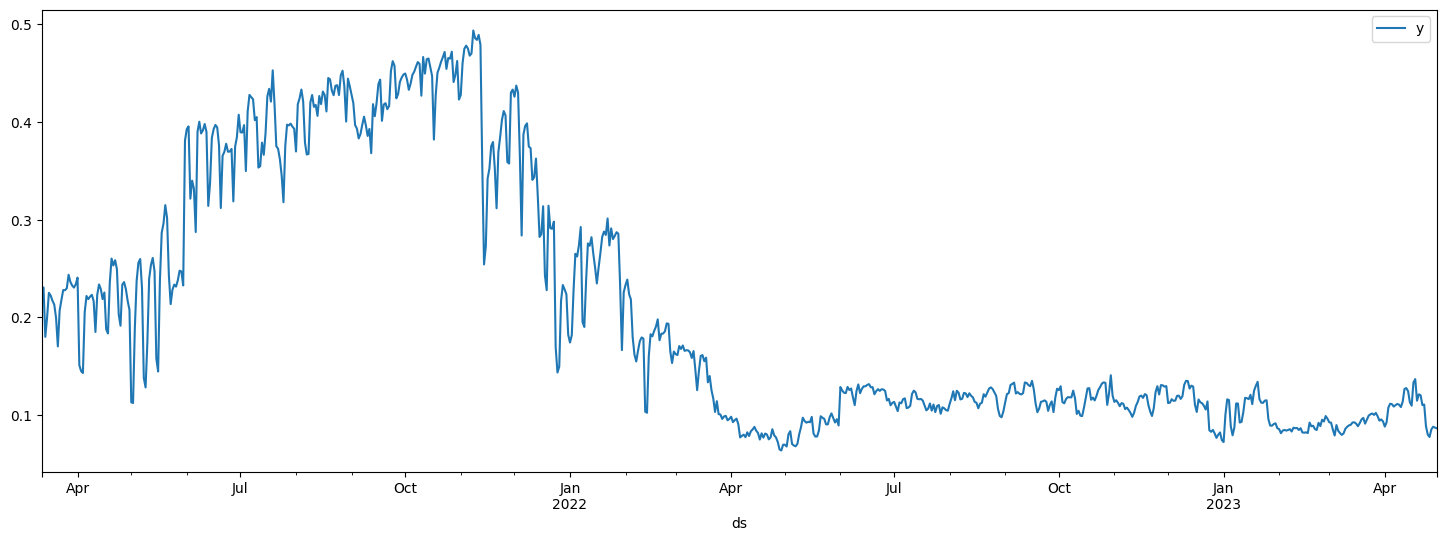

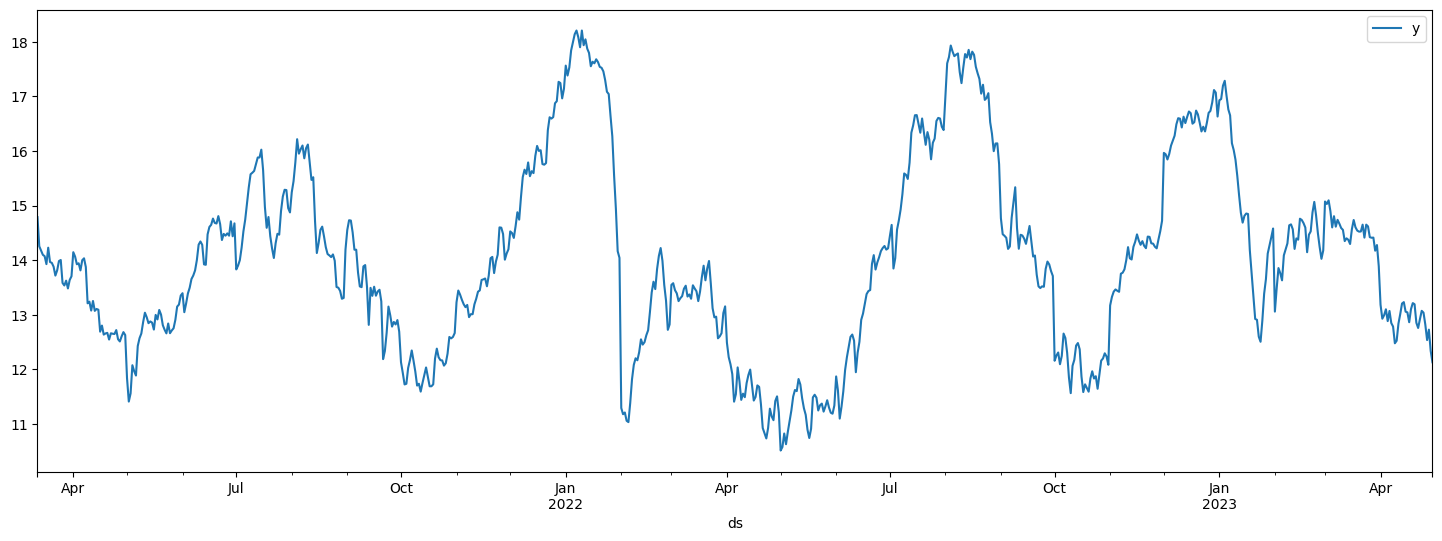

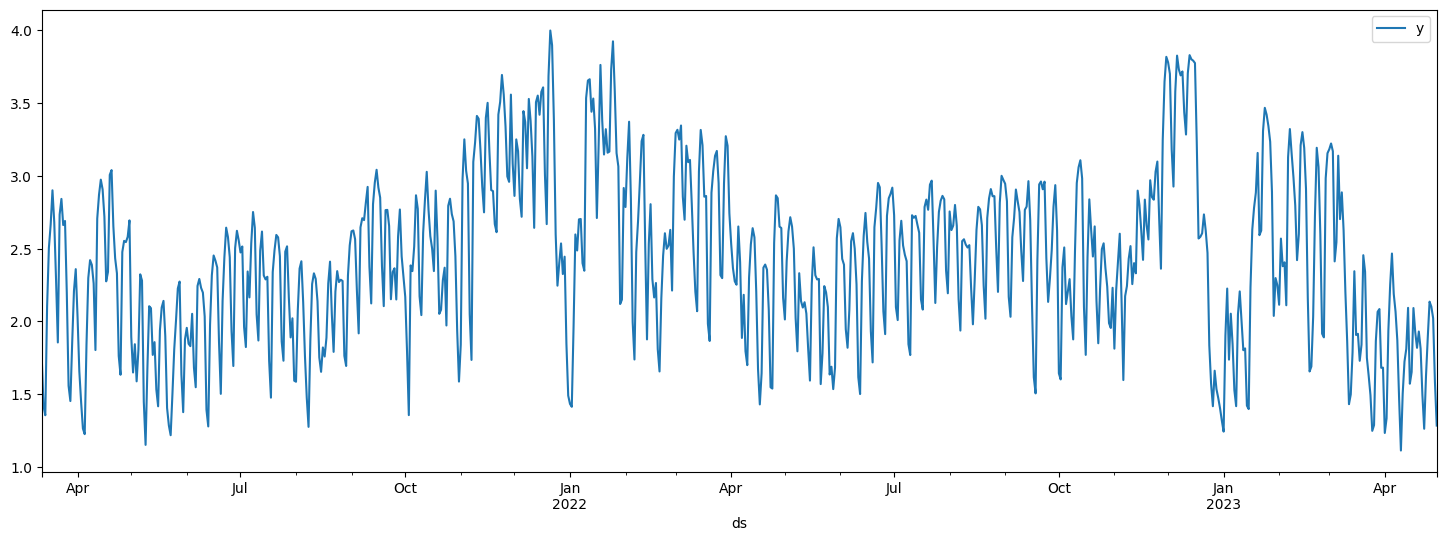

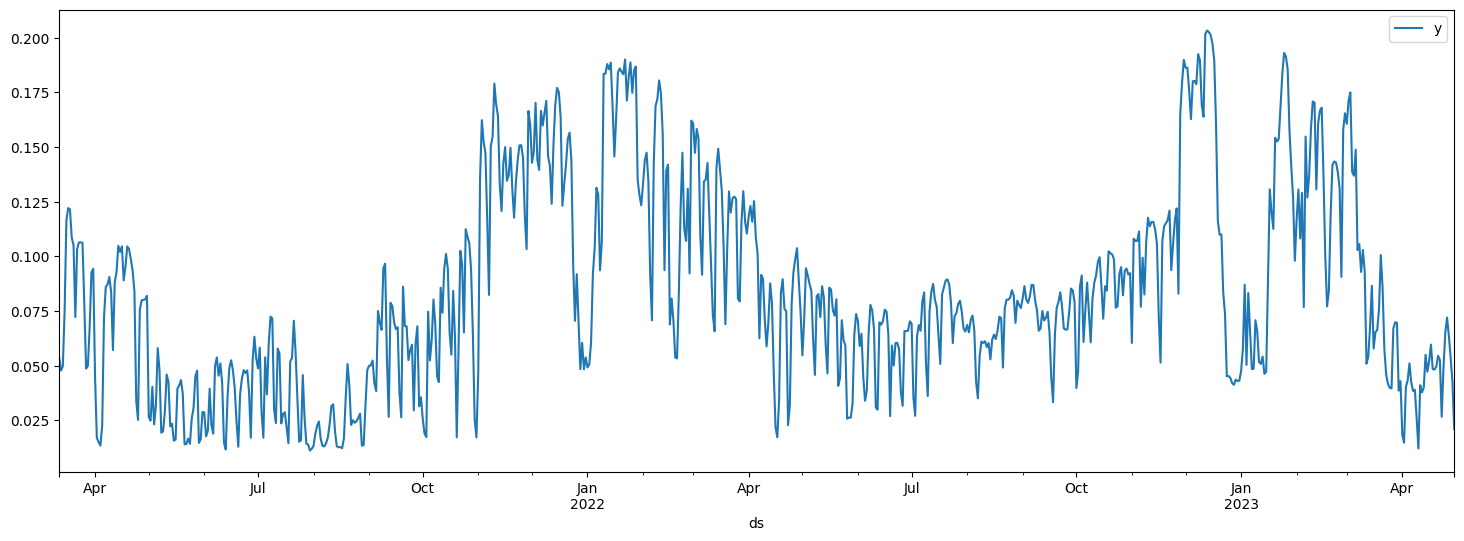

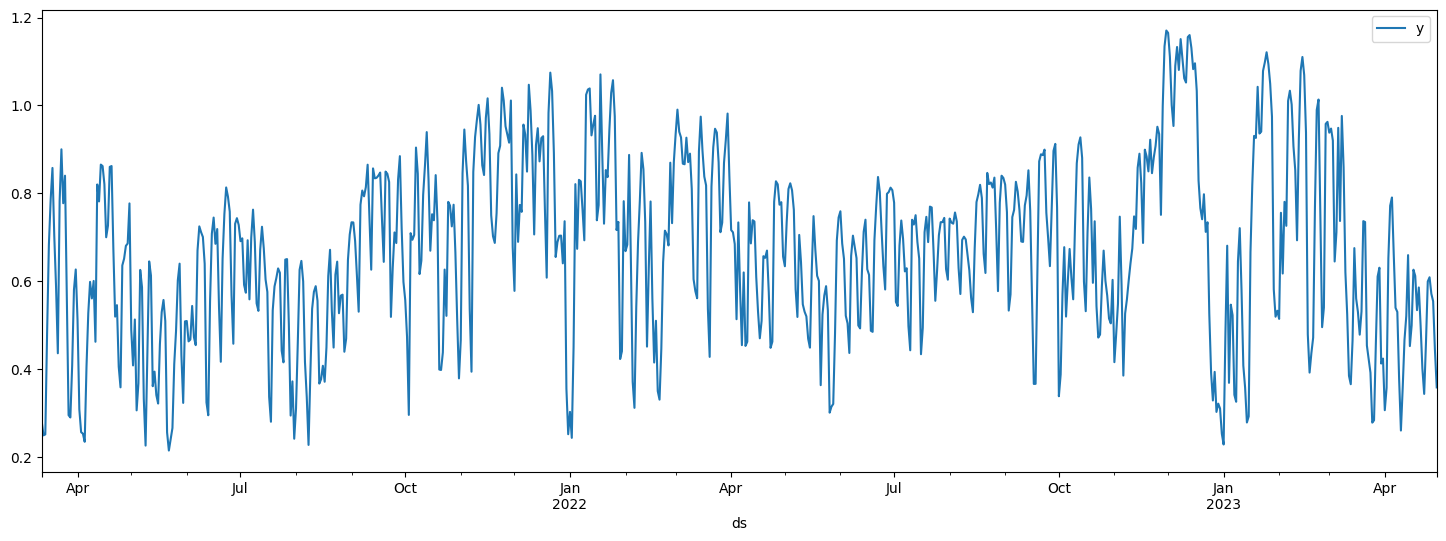

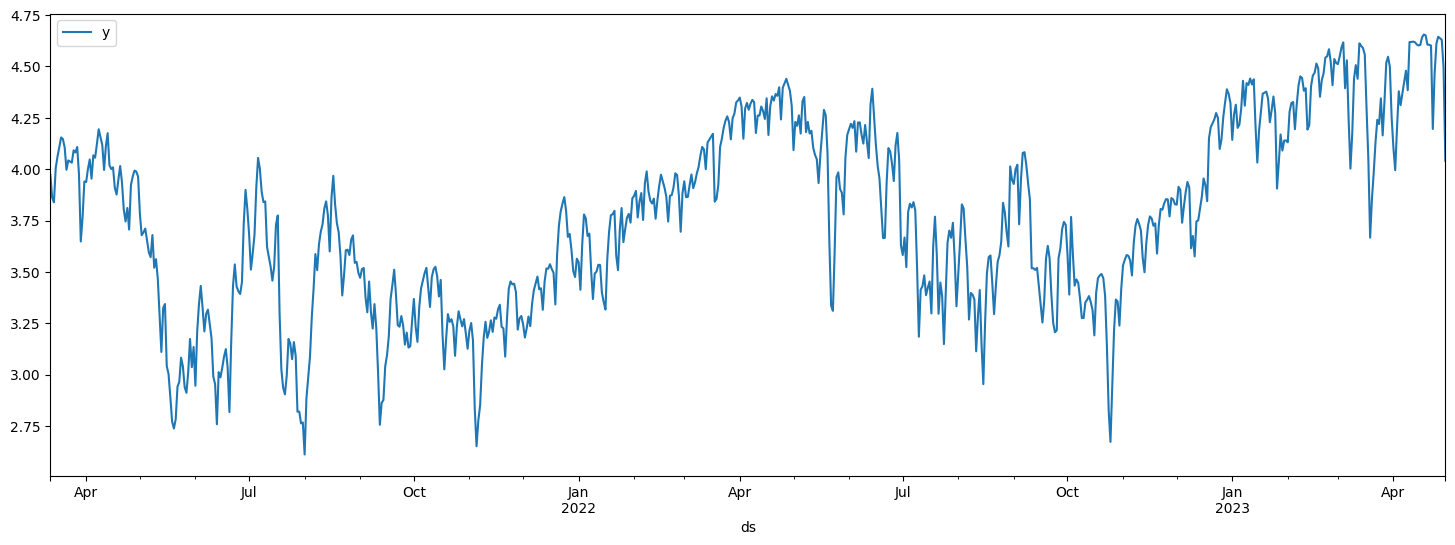

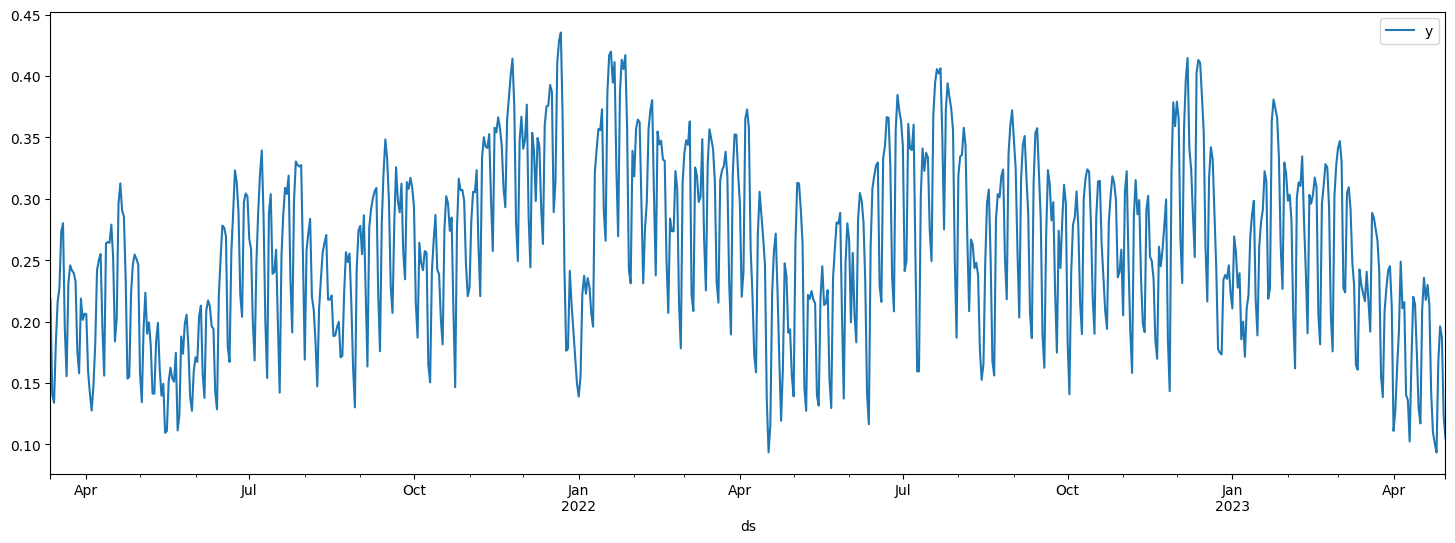

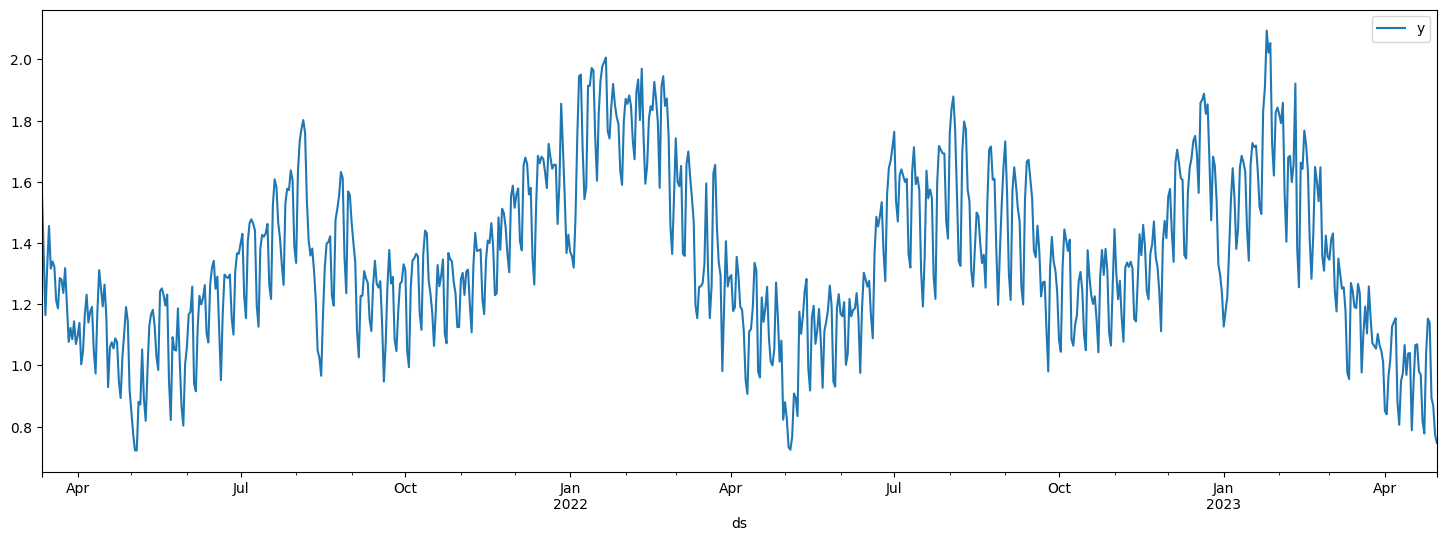

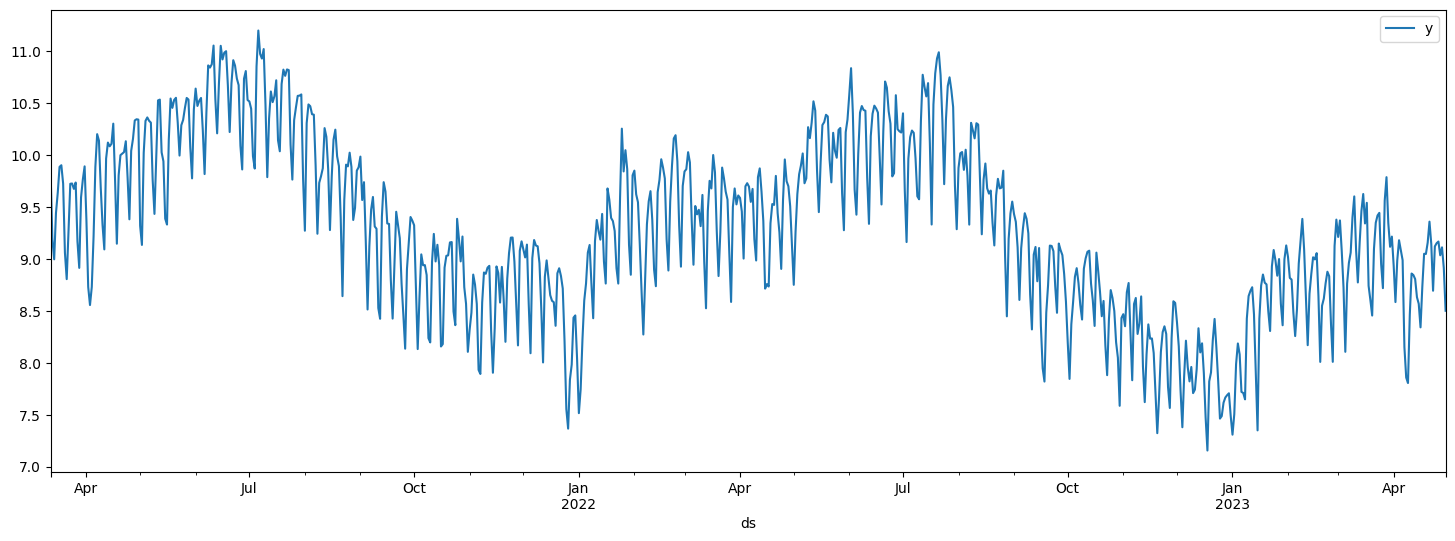

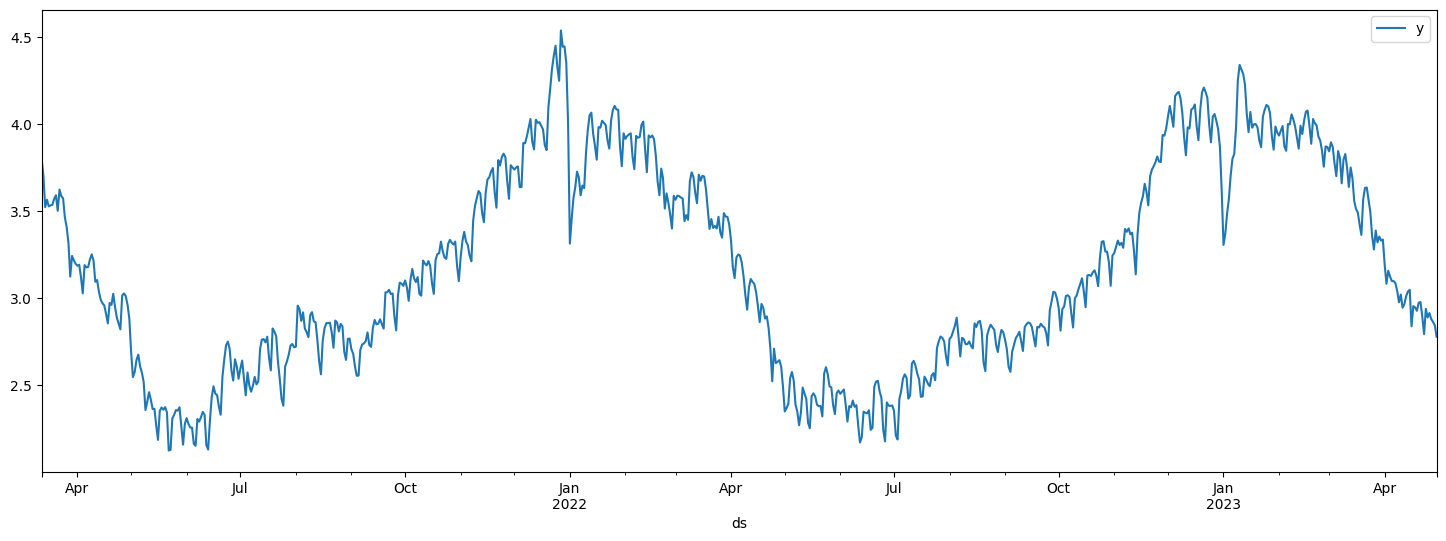

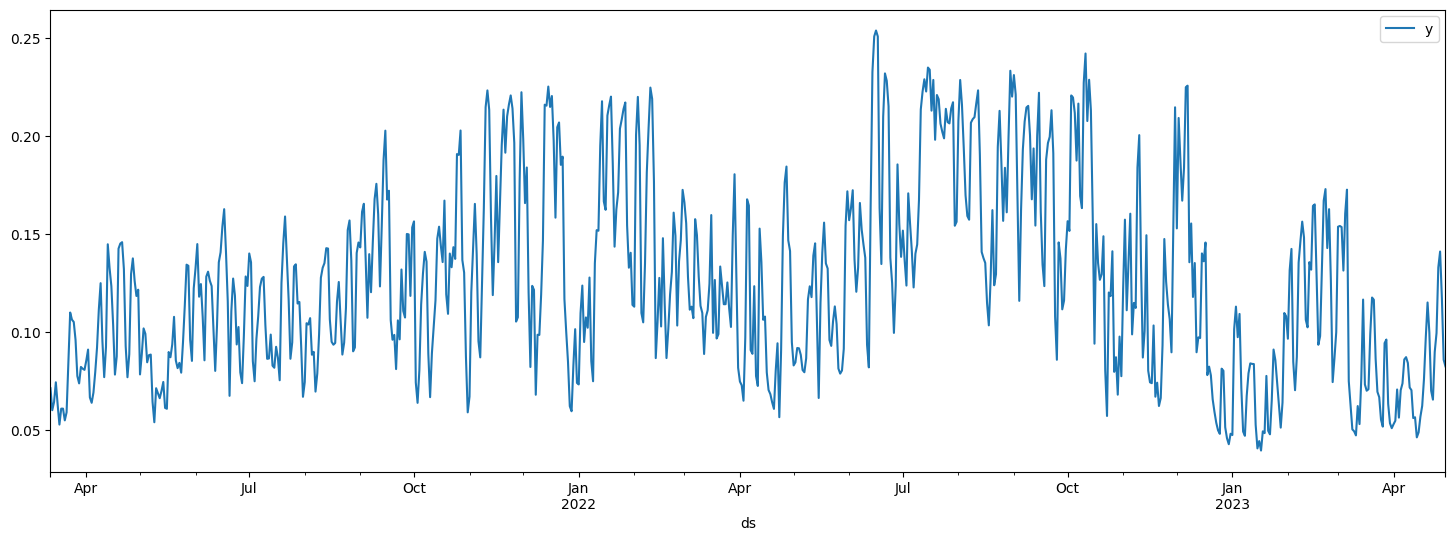

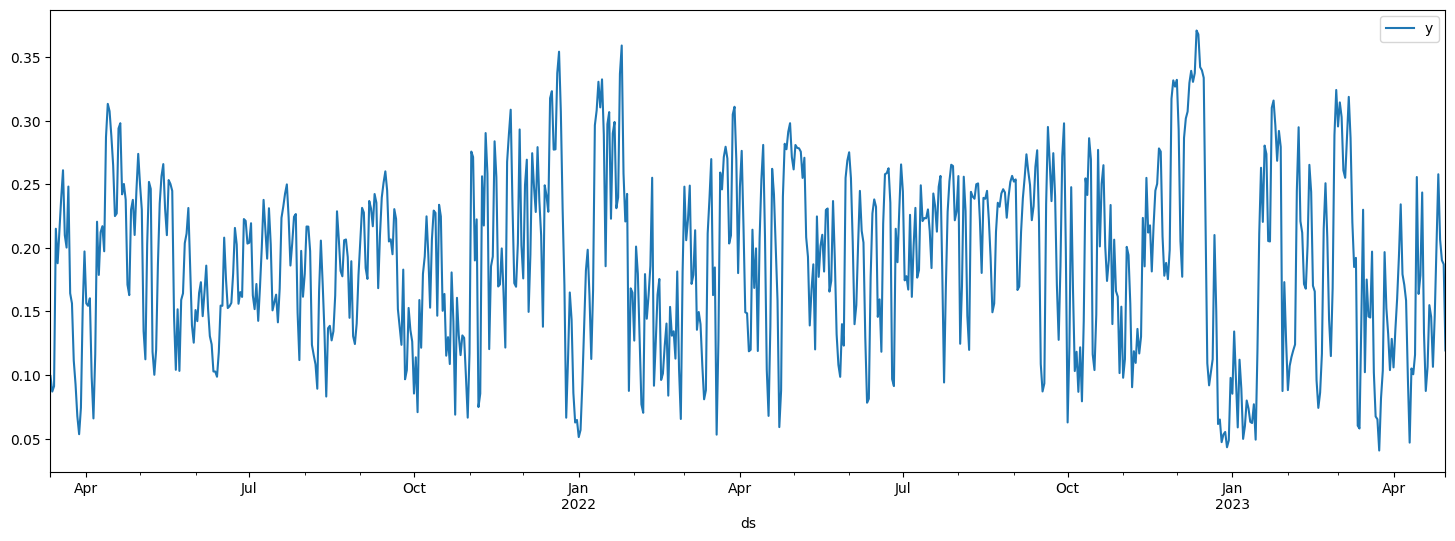

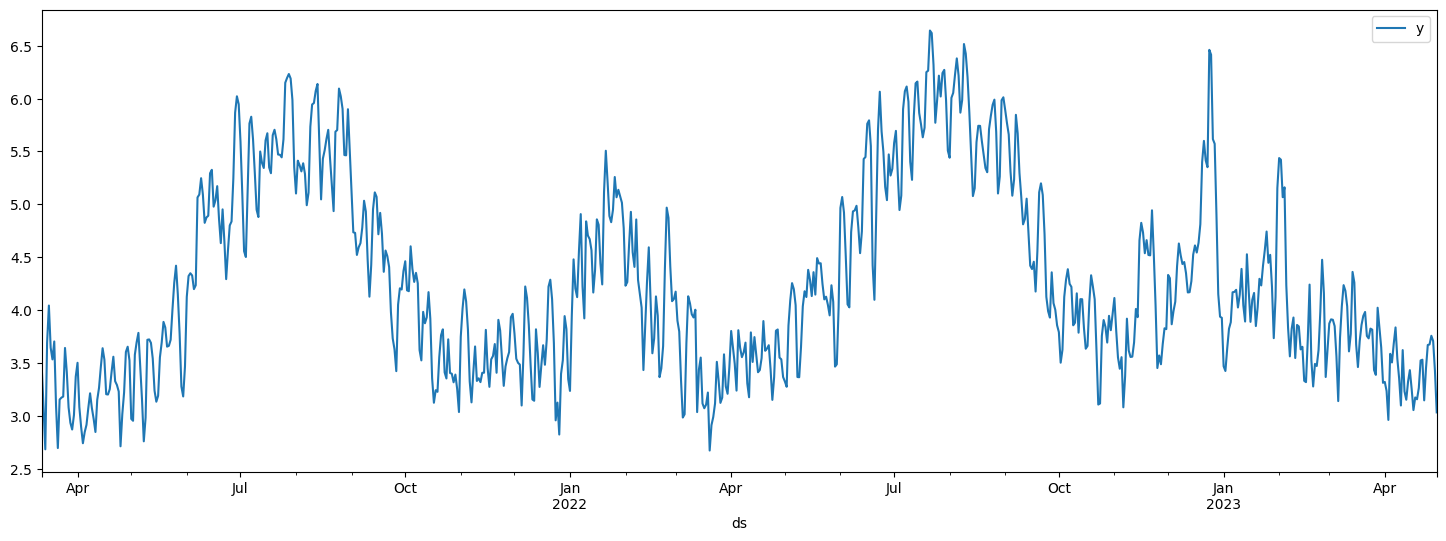

In [12]:
for country_name in country_list:
    country_df(country_name, df)
    show_df_info(globals()['df_' + country_name])

In [13]:
m = Prophet()

In [14]:
def add_country_prophet(country_name):
    globals()['m_' + country_name] = Prophet()
    print(f'm_{country_name} Prophet added')

In [15]:
for country_name in country_list:
    add_country_prophet(country_name)

m_Brazil Prophet added
m_China Prophet added
m_EU27 & UK Prophet added
m_France Prophet added
m_Germany Prophet added
m_India Prophet added
m_Italy Prophet added
m_Japan Prophet added
m_ROW Prophet added
m_Russia Prophet added
m_Spain Prophet added
m_UK Prophet added
m_US Prophet added


In [16]:
def fit_n_train_prophet(df_local, country_name):
    m = globals()['m_' + country_name]
    m.add_seasonality(name='weekly', period=7, fourier_order=3)
    m.add_seasonality(name='daily', period=1, fourier_order=3)
    m.fit(df_local)

    future = m.make_future_dataframe(periods=31)
    forecast = m.predict(future)
    # print(forecast.head(), forecast.tail(), sep='\n')
    # print('\n\n')
    return forecast

In [17]:
country_forecasts = {name: None for name in country_list}
country_forecasts

{'Brazil': None,
 'China': None,
 'EU27 & UK': None,
 'France': None,
 'Germany': None,
 'India': None,
 'Italy': None,
 'Japan': None,
 'ROW': None,
 'Russia': None,
 'Spain': None,
 'UK': None,
 'US': None}

In [18]:
for country_name in country_list:
    current_df = globals()['df_' + country_name]
    country_forecasts[country_name] = fit_n_train_prophet(current_df, country_name)

18:38:59 - cmdstanpy - INFO - Chain [1] start processing
18:38:59 - cmdstanpy - INFO - Chain [1] done processing
18:39:00 - cmdstanpy - INFO - Chain [1] start processing
18:39:00 - cmdstanpy - INFO - Chain [1] done processing
18:39:01 - cmdstanpy - INFO - Chain [1] start processing
18:39:01 - cmdstanpy - INFO - Chain [1] done processing
18:39:01 - cmdstanpy - INFO - Chain [1] start processing
18:39:01 - cmdstanpy - INFO - Chain [1] done processing
18:39:02 - cmdstanpy - INFO - Chain [1] start processing
18:39:02 - cmdstanpy - INFO - Chain [1] done processing
18:39:02 - cmdstanpy - INFO - Chain [1] start processing
18:39:03 - cmdstanpy - INFO - Chain [1] done processing
18:39:03 - cmdstanpy - INFO - Chain [1] start processing
18:39:03 - cmdstanpy - INFO - Chain [1] done processing
18:39:04 - cmdstanpy - INFO - Chain [1] start processing
18:39:04 - cmdstanpy - INFO - Chain [1] done processing
18:39:05 - cmdstanpy - INFO - Chain [1] start processing
18:39:05 - cmdstanpy - INFO - Chain [1]

In [19]:
country_forecasts['Brazil']

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-03-12  0.243568    0.192715    0.256828     0.243568     0.243568   
1   2021-03-13  0.244014    0.181597    0.245013     0.244014     0.244014   
2   2021-03-14  0.244460    0.167074    0.232713     0.244460     0.244460   
3   2021-03-15  0.244906    0.184850    0.251442     0.244906     0.244906   
4   2021-03-16  0.245352    0.190957    0.255007     0.245352     0.245352   
..         ...       ...         ...         ...          ...          ...   
806 2023-05-27  0.184577    0.155368    0.221353     0.182274     0.186702   
807 2023-05-28  0.185454    0.153136    0.212844     0.183000     0.187738   
808 2023-05-29  0.186330    0.173514    0.241572     0.183749     0.188708   
809 2023-05-30  0.187207    0.187040    0.252718     0.184453     0.189784   
810 2023-05-31  0.188083    0.194404    0.258083     0.185190     0.190805   

     additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0         -0.018311             -0.018311             -0.018311  0.049942   
1         -0.031397             -0.031397             -0.031397  0.049942   
2         -0.044135             -0.044135             -0.044135  0.049942   
3         -0.026627             -0.026627             -0.026627  0.049942   
4         -0.023152             -0.023152             -0.023152  0.049942   
..              ...                   ...                   ...       ...   
806        0.003129              0.003129              0.003129  0.049942   
807       -0.002666             -0.002666             -0.002666  0.049942   
808        0.021711              0.021711              0.021711  0.049942   
809        0.031913              0.031913              0.031913  0.049942   
810        0.037324              0.037324              0.037324  0.049942   

     ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0    ...  0.004155      0.004155      0.004155 -0.072408     -0.072408   
1    ... -0.007110     -0.007110     -0.007110 -0.074229     -0.074229   
2    ... -0.018084     -0.018084     -0.018084 -0.075993     -0.075993   
3    ...  0.001107      0.001107      0.001107 -0.077675     -0.077675   
4    ...  0.006162      0.006162      0.006162 -0.079256     -0.079256   
..   ...       ...           ...           ...       ...           ...   
806  ... -0.007110     -0.007110     -0.007110 -0.039703     -0.039703   
807  ... -0.018084     -0.018084     -0.018084 -0.034524     -0.034524   
808  ...  0.001107      0.001107      0.001107 -0.029338     -0.029338   
809  ...  0.006162      0.006162      0.006162 -0.024191     -0.024191   
810  ...  0.006512      0.006512      0.006512 -0.019131     -0.019131   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0       -0.072408                   0.0                         0.0   
1       -0.074229                   0.0                         0.0   
2       -0.075993                   0.0                         0.0   
3       -0.077675                   0.0                         0.0   
4       -0.079256                   0.0                         0.0   
..            ...                   ...                         ...   
806     -0.039703                   0.0                         0.0   
807     -0.034524                   0.0                         0.0   
808     -0.029338                   0.0                         0.0   
809     -0.024191                   0.0                         0.0   
810     -0.019131                   0.0                         0.0   

     multiplicative_terms_upper      yhat  
0                           0.0  0.225257  
1                           0.0  0.212618  
2                           0.0  0.200326  
3                           0.0  0.218280  
4                           0.0  0.222200  
..                          ...       ...  
806                         0.0  0.187707  
807                         0.0  0.182788  
808         

In [20]:
def create_graph(country_name):
    m = globals()['m_' + country_name]
    forecast = country_forecasts[country_name]
    pl = plot_plotly(m, forecast)
    pl.update_layout(title=f'{country_name} Forecast thingy')
    return pl
    

In [21]:
country_forecasts_plots = {name: None for name in country_list}

In [22]:
for country_name in country_list:
    country_forecasts_plots[country_name] = create_graph(country_name)

In [23]:
country_forecasts_plots['Brazil'].show()

In [24]:
country_forecasts_results = {name: None for name in country_list}

In [25]:
for country_name in country_list:
    country_forecasts_results[country_name] = country_forecasts[country_name][['ds', 'yhat']]
    country_forecasts_results[country_name] = country_forecasts_results[country_name][-31:].reset_index(drop=True)
    country_forecasts_results[country_name] = country_forecasts_results[country_name].rename(columns={'yhat': 'y', 'ds': 'date'})

In [26]:
country_forecasts_results['Brazil'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    31 non-null     datetime64[ns]
 1   y       31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 624.0 bytes


In [27]:
country_forecasts_results['Brazil'].tail()

date         y
26 2023-05-27  0.187707
27 2023-05-28  0.182788
28 2023-05-29  0.208041
29 2023-05-30  0.219120
30 2023-05-31  0.225407

In [28]:
start_date = datetime.datetime(2023, 5, 1)
end_date = datetime.datetime(2023, 5, 31)
date_range = pd.date_range(start=start_date, end=end_date)

In [29]:
df_result = pd.DataFrame({'date': date_range})

In [30]:
for column in country_list:
    df_result.insert(loc=0, column=column, value=None)
df_result = df_result.loc[:, ::-1]

In [31]:
for country_name in country_list:
    for i in range(len(country_forecasts_results[country_name])):
        df_result[country_name][i] = country_forecasts_results[country_name]['y'][i]

C:\Users\nsmir\AppData\Local\Temp\ipykernel_12888\1502176842.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nsmir\AppData\Local\Temp\ipykernel_12888\1502176842.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nsmir\AppData\Local\Temp\ipykernel_12888\1502176842.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nsmir\AppData\Local\Temp\ipykernel_12888\1502176842.py:3: SettingWithCopyWarning:


A value

In [32]:
df_result

date    Brazil      China EU27 & UK    France   Germany     India  \
0  2023-05-01  0.114559  12.845115  1.790522  0.044841   0.56669  4.386293   
1  2023-05-02  0.120386  12.941132  1.941559  0.048843  0.620358  4.404851   
2  2023-05-03  0.121568   13.02052  1.929217  0.048087  0.609952  4.379916   
3  2023-05-04  0.123218  13.087709   1.85392  0.045966  0.579291    4.3348   
4  2023-05-05  0.121111  13.089679  1.736661  0.042331  0.533826  4.302331   
5  2023-05-06  0.110949  13.029904  1.290753  0.024852  0.415325  4.239924   
6  2023-05-07  0.101207  12.949644  1.093274  0.013759   0.36546   4.06911   
7  2023-05-08  0.121781  13.051279  1.665198  0.037113  0.525863  4.157811   
8  2023-05-09  0.128392  13.146533  1.810549  0.040313  0.576285  4.172965   
9  2023-05-10  0.130495  13.223292  1.792611  0.038735  0.562694  4.146872   
10 2023-05-11  0.133211  13.286485  1.711951  0.035795  0.528986  4.102843   
11 2023-05-12  0.132319  13.283609  1.589728  0.031368  0.480696  4.073676   
12 2023-05-13  0.123524  13.218667  1.139441   0.01315   0.35968  4.016712   
13 2023-05-14  0.115296  13.133439  0.938368  0.001394  0.307703  3.853375   
14 2023-05-15  0.137525  13.230801  1.507693  0.024184  0.466491  3.951446   
15 2023-05-16  0.145922   13.32294  1.651645  0.026944  0.515886  3.977695   
16 2023-05-17  0.149923  13.398153  1.633711  0.025068  0.501942  3.964224   
17 2023-05-18  0.154631  13.461726  1.554641  0.021989  0.468631   3.93413   
18 2023-05-19    0.1558  13.461444  1.435756  0.017595  0.421554  3.919974   
19 2023-05-20  0.149106  13.401527  0.990686  -0.00041  0.302617  3.878854   
20 2023-05-21   0.14299  13.323893  0.796803 -0.011769   0.25362  3.731943   
21 2023-05-22  0.167306  13.431481  1.375339  0.011603  0.416305   3.84677   
22 2023-05-23  0.177731  13.536461   1.53053  0.015122  0.470506  3.889857   
23 2023-05-24  0.183664  13.627039  1.525816  0.014173  0.462253  3.893068   
24 2023-05-25   0.19017   13.70834  1.461846  0.012172  0.435468  3.879274   
25 2023-05-26  0.192971  13.727928  1.359792  0.008988  0.395683  3.880831   
26 2023-05-27  0.187707  13.689744  0.933083   -0.0077  0.284713  3.854653   
27 2023-05-28  0.182788  13.635382  0.758841  -0.01766  0.244246  3.721752   
28 2023-05-29  0.208041  13.767426  1.358009  0.007161  0.415897  3.849525   
29 2023-05-30   0.21912  13.897663  1.534495  0.012147  0.479358  3.904389   
30 2023-05-31  0.225407  14.013909  1.551379  0.012652  0.480504  3.918135   

       Italy     Japan       ROW    Russia     Spain        UK        US  
0   0.166821  0.805485  9.205267  2.729636   0.07135  0.211295   3.50366  
1   0.184903  0.870107  9.461666  2.719594  0.080703   0.21972  3.732142  
2   0.188027   0.85813  9.490554   2.70769  0.082567  0.214401  3.770879  
3   0.183287  0.855955  9.505189  2.684194  0.078163  0.213112  3.793067  
4   0.168263   0.85161  9.444475  2.647859  0.072194   0.20742  3.741281  
5   0.097789  0.682677  9.010725  2.532505   0.04729  0.172843   3.63235  
6   0.071778  0.615648  8.714247  2.445776  0.036612  0.159441  3.460695  
7   0.160468  0.823971  9.372853   2.57721  0.061535  0.213283  3.662698  
8   0.177943  0.896893  9.617355  2.572874  0.070195  0.220343  3.895157  
9   0.180281  0.892054  9.633387   2.56752  0.071486  0.213445  3.935988  
10   0.17461  0.895724   9.63456  2.551321  0.066656  0.210382  3.958435  
11  0.158552  0.895838  9.560145  2.522917   0.06043  0.202751   3.90519  
12  0.086984  0.729923  9.112827  2.416006   0.03546  0.166103  3.793271  
13  0.059871  0.664456  8.803282  2.338099  0.024927  0.150538  3.617346  
14  0.147505  0.872915   9.44967    2.4786  0.050218  0.202172  3.814103  
15  0.164022  0.944612  9.683122   2.48344  0.059479  0.207029  4.040686  
16  0.165559  0.937296   9.68956  2.487235  0.061613  0.197984  4.075396  
17  0.159294  0.937375  9.682834  2.480029  0.057866  0.192883   4.09188  
18  0.142898  0.932953  9.602404  2.460343  0.052957  0.183374  4.033242  
19  0.071292

In [33]:
country_forecasts_results['Brazil'].head()

date         y
0 2023-05-01  0.114559
1 2023-05-02  0.120386
2 2023-05-03  0.121568
3 2023-05-04  0.123218
4 2023-05-05  0.121111

In [34]:
country_forecasts_plots['Brazil'].show()

In [35]:
df_result.to_csv(data_predicted_path, index=False)